## Analyze Fiit's Like Study (Line) Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style = "whitegrid")

In [2]:
def getAngle(cnt, cycle = 11) :
    
    n = (cnt%2 * cycle//2 + cnt//2 + cnt%2) % cycle
    angle = (360/cycle)*n
    
    return angle

In [3]:
# Effective Target Angel : Except smallest two, Largest two, and three middle Angle

def isEffAngle(cnt, cycle = 11) :
    
    EffAngle = []
    for i in range(1, cycle+1) :
        
        Center = cycle//2 + 1
        
        if (i > 2 and i < Center-1) or (i > Center+1 and i < cycle-1) : 
            EffAngle.append(i)
            
    return cnt in EffAngle
        

In [4]:
_dir = r"DualSensorMouse_Fittslike_Circle\Logs"

In [5]:
os.listdir(_dir)

['BMH_circle1',
 'BMH_circle2',
 'BMH_circle3',
 'BMH_circle4',
 'BMH_circle5',
 'BMH_circle6',
 'BMH_circle7',
 'BMH_circle8',
 'LHN_circle1',
 'RYS_circle1',
 'RYS_circle2']

In [6]:
Username = "LHN"
UsernameC = "_circle1"

In [7]:
_dirC = _dir+f"/{Username+UsernameC}"

In [8]:
dirlstW = os.listdir(_dirC)
dirlstW

['2024_03_08_14_44_28_Practice_600_50_logs']

---

In [9]:
dflstW = []

for dw in dirlstW :
    
    Dirw = _dirC + f"/{dw}/Pos_values.csv"
    dfw = pd.read_csv(Dirw)
    dfw = dfw[dfw["Success"] == "T"]
    dflstW.append(dfw)

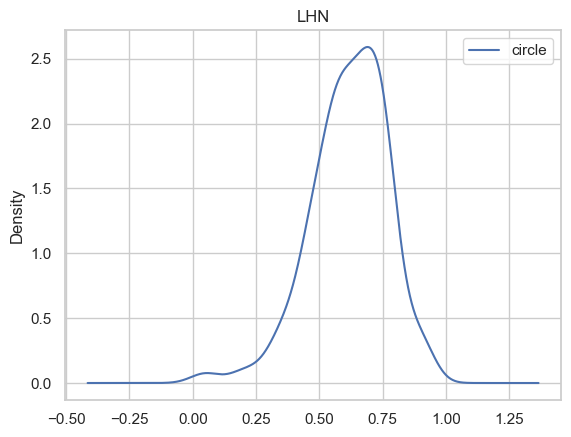

In [10]:
for dfw in dflstW :
    
    dfw["PositionValue"].plot.density(label="circle")
    plt.legend()
    plt.title(Username)

Center of Mass for dfC: 0.6149356261022927


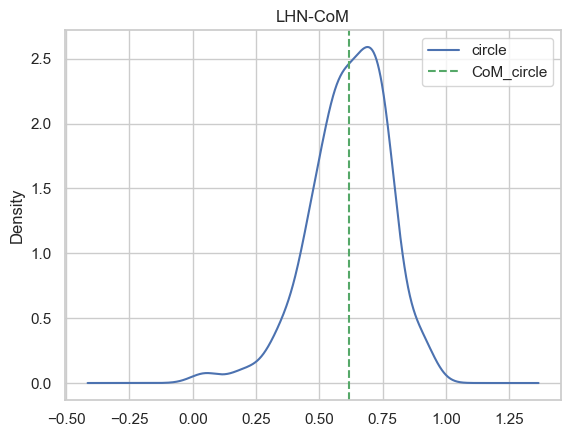

In [11]:
data_dfw = dfw["PositionValue"]

histw, bin_edgesw = np.histogram(data_dfw, bins=30, density=True)

bin_centersw = (bin_edgesw[:-1] + bin_edgesw[1:]) / 2

com_dfw = np.sum(bin_centersw * histw) / np.sum(histw)

print("Center of Mass for dfC:", com_dfw)

dfw["PositionValue"].plot.density(label="circle")
plt.axvline(x=com_dfw, color='g', linestyle='--', label='CoM_circle')
plt.legend()
plt.title(Username+"-CoM")
plt.show()